# Final Project  - Deep Learning (Products table)
### Creating a Recommendation System
#### Nave Cohen: 313383135     &     Natali Germay: 311334148

### Part 1  - Exploring The Data

In [ ]:
#! pip install -q kaggle
from google.colab import files

files.upload()  # Choose the kaggle.json file that you downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nave2402","key":"a3e3d3a3b0fef4a865b9cf07c61c0207"}'}

In [ ]:
# Importing libraries to explore the database
import numpy as np
import pandas as pd
import os

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
 ! kaggle datasets list

In [ ]:
!kaggle datasets download -d odins0n/hm256x256

 99% 2.11G/2.13G [00:19<00:00, 142MB/s]
100% 2.13G/2.13G [00:19<00:00, 117MB/s]


In [ ]:
!unzip -qq hm256x256

In [ ]:
# Creating a dataframes from the csv
Products_Original = pd.read_csv("articles.csv")
Costumers_Original =  pd.read_csv("customers.csv")
Transactions_Original = pd.read_csv("transactions_train.csv")

#### Product table investigation

In [ ]:
#Products_Original.head()
#Products_Original.describe()
# Extracting desired columns from Products_Original table
desired_columns = ['article_id','prod_name','product_type_name','product_group_name','graphical_appearance_name','colour_group_name','perceived_colour_value_name',
                   'perceived_colour_master_name','department_name','index_name','index_group_name','section_name','garment_group_name']
Products = Products_Original[desired_columns].copy()
#Transactions_Original.head()
average_prices = Transactions_Original.groupby('article_id')['price'].mean().reset_index(name='price')
average_prices['price'] = (average_prices['price'] * 1000).round(2)
# Now I will add the product price column from the average_prices table
Products = Products.merge(average_prices[['article_id','price']], on='article_id', how='inner')
Products.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,price
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,8.14
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,8.11
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,4.98
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",20.22
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",18.21


In [ ]:
# Calculate the number of records (rows) in the DataFrame
num_records = len(Products)
print(f"כמות הרשומות בטבלה: {num_records}" , '\n=======================' )

# Display information about each column
column_info = Products.info()
print(column_info , '\n=======================' )

# Check for missing values in each column
missing_values = Products.isnull().sum()
print("נתונים חסרים בכל עמודה:")
print(missing_values , '\n=======================' )

# Display basic statistics about numeric columns
numeric_stats = Products.describe()
print("סטטיסטיקות בסיסיות עבור עמודות מספריות:" )
print(numeric_stats , '\n=======================' )


כמות הרשומות בטבלה: 104547 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104547 entries, 0 to 104546
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   article_id                    104547 non-null  int64  
 1   prod_name                     104547 non-null  object 
 2   product_type_name             104547 non-null  object 
 3   product_group_name            104547 non-null  object 
 4   graphical_appearance_name     104547 non-null  object 
 5   colour_group_name             104547 non-null  object 
 6   perceived_colour_value_name   104547 non-null  object 
 7   perceived_colour_master_name  104547 non-null  object 
 8   department_name               104547 non-null  object 
 9   index_name                    104547 non-null  object 
 10  index_group_name              104547 non-null  object 
 11  section_name                  104547 non-null  object 
 12  garment_group_na

In [ ]:
# Counting the products in each department
department_counts = Products['department_name'].value_counts()
print(department_counts)


Jersey                             4560
Knitwear                           3441
Trouser                            2638
Blouse                             2342
Swimwear                           2075
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64


In [ ]:
# Section counts for top 5 departments
jersey_section_counts = Products[Products['department_name'] == 'Jersey']['section_name'].value_counts()
print(jersey_section_counts , '\n=======================' )
Knitwear_section_counts = Products[Products['department_name'] == 'Knitwear']['section_name'].value_counts()
print(Knitwear_section_counts, '\n=======================' )
Trouser_section_counts = Products[Products['department_name'] == 'Trouser']['section_name'].value_counts()
print(Trouser_section_counts, '\n=======================' )
Blouse_section_counts = Products[Products['department_name'] == 'Blouse ']['section_name'].value_counts()
print(Blouse_section_counts, '\n=======================' )
Swimwear_section_counts = Products[Products['department_name'] == 'Swimwear']['section_name'].value_counts()
print(Swimwear_section_counts, '\n=======================' )

Mama                1103
Womens Casual       1023
H&M+                 889
Womens Trend         869
Womens Tailoring     676
Name: section_name, dtype: int64 
Womens Everyday Collection    925
Men Suits & Tailoring         420
Contemporary Smart            367
Womens Casual                 355
Womens Tailoring              341
Womens Trend                  329
Contemporary Casual           182
H&M+                          179
Mama                          140
Men Edition                   140
Contemporary Street            63
Name: section_name, dtype: int64 
Womens Everyday Collection    910
Womens Tailoring              467
Womens Casual                 320
Contemporary Smart            305
Contemporary Casual           235
Men Suits & Tailoring         225
Contemporary Street           176
Name: section_name, dtype: int64 
Series([], Name: section_name, dtype: int64) 
Womens Swimwear, beachwear    1839
Men Underwear                  236
Name: section_name, dtype: int64 


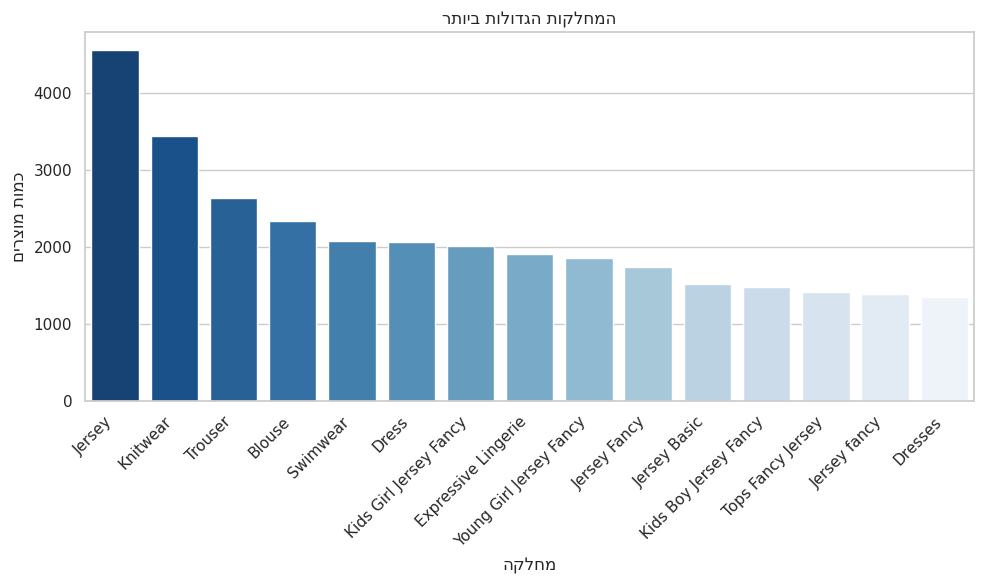

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
top_departments = Products['department_name'].value_counts().head(15)  # Selecting the top 15 departments
sns.barplot(data=top_departments.reset_index(), x='index', y='department_name', palette='Blues_r')
plt.title('רתויב תולודגה תוקלחמה')
plt.xlabel('הקלחמ')
plt.ylabel('םירצומ תומכ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


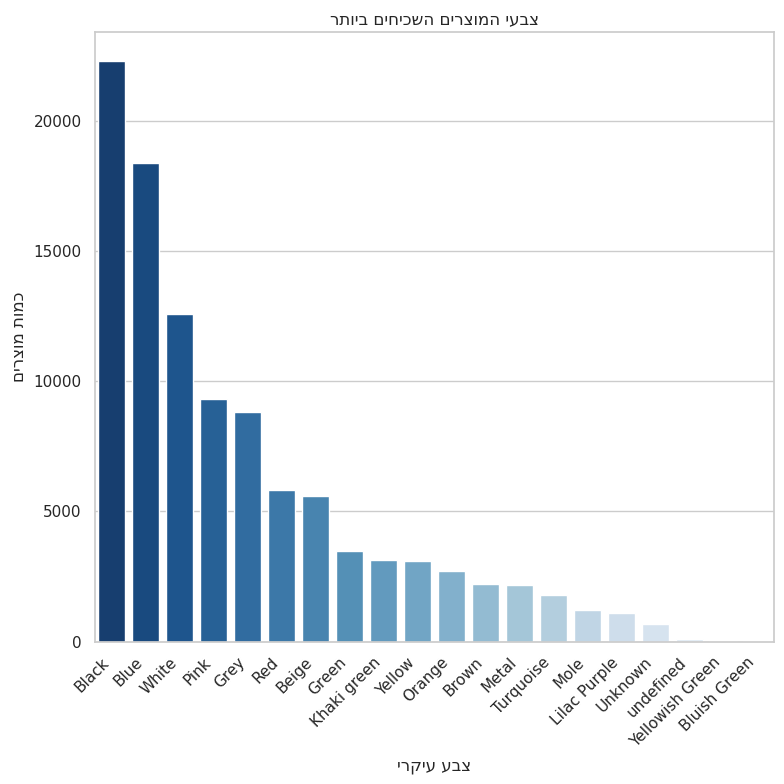

In [ ]:
sns.set(style="whitegrid")

colour_counts = Products['perceived_colour_master_name'].value_counts()
colour_counts = colour_counts.reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(data=colour_counts, x='index', y='perceived_colour_master_name', palette='Blues_r')
plt.title('רתויב םיחיכשה םירצומה יעבצ')
plt.xlabel('ירקיע עבצ')
plt.ylabel('םירצומ תומכ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


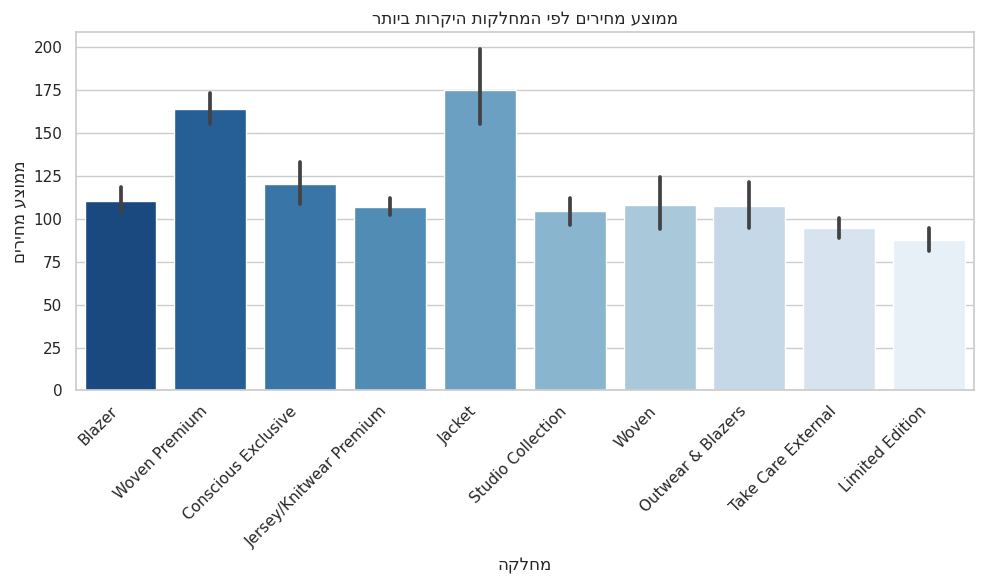

In [ ]:
sns.set(style="whitegrid")

top_departments = Products.groupby('department_name')['price'].mean().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.barplot(x='department_name', y='price', data=Products[Products['department_name'].isin(top_departments)], estimator=lambda x: x.mean(), palette='Blues_r')
plt.title('רתויב תורקיה תוקלחמה יפל םיריחמ עצוממ')
plt.xlabel('הקלחמ')
plt.ylabel('םיריחמ עצוממ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


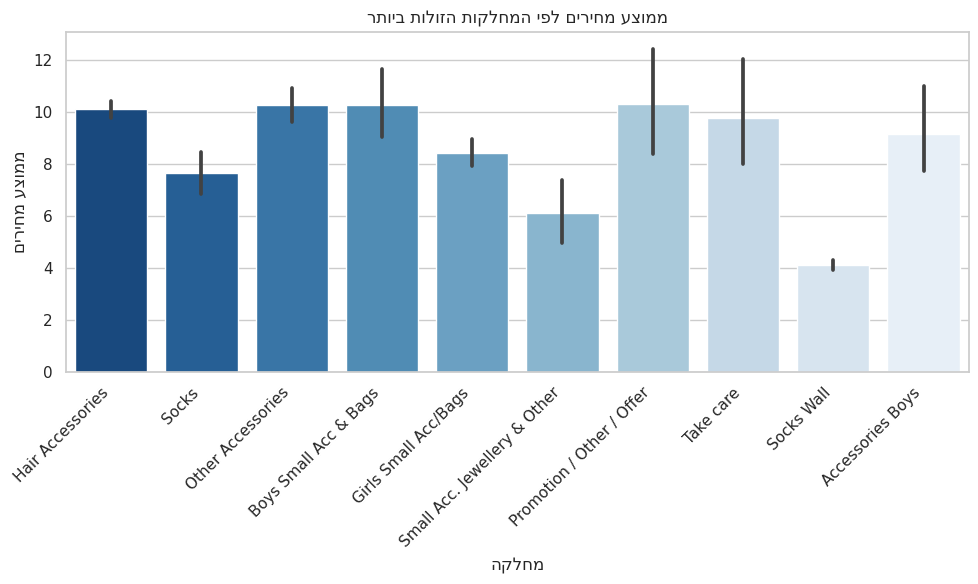

In [ ]:
sns.set(style="whitegrid")
top_departments = Products.groupby('department_name')['price'].mean().nsmallest(10).index

plt.figure(figsize=(10, 6))
sns.barplot(x='department_name', y='price', data=Products[Products['department_name'].isin(top_departments)], estimator=lambda x: x.mean(), palette='Blues_r')
plt.title('רתויב תולוזה תוקלחמה יפל םיריחמ עצוממ')
plt.xlabel('הקלחמ')
plt.ylabel('םיריחמ עצוממ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


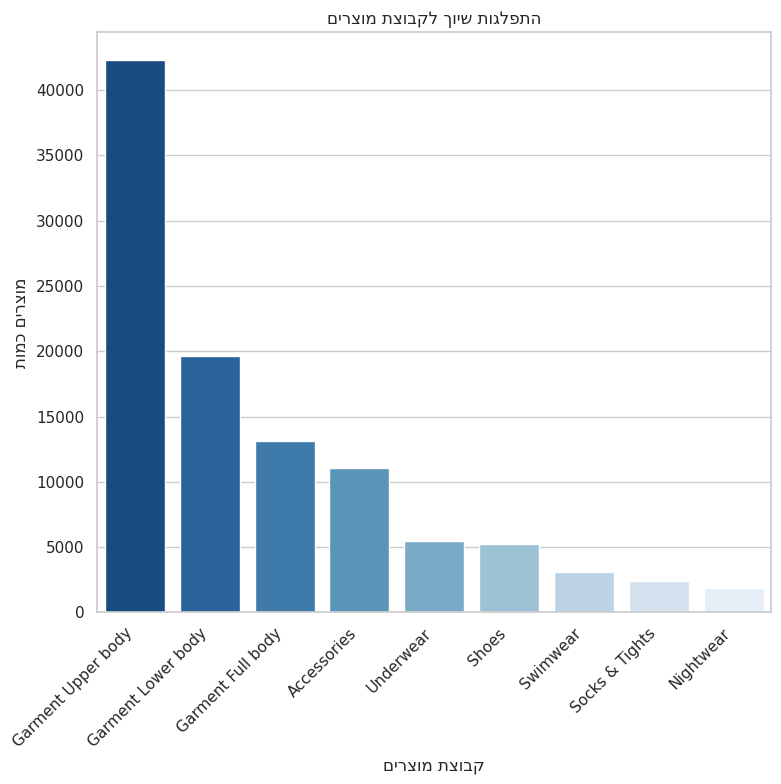

In [ ]:
sns.set(style="whitegrid")

product_group_distribution = Products['product_group_name'].value_counts().head(9)

plt.figure(figsize=(8, 8))
sns.barplot(x=product_group_distribution.index, y=product_group_distribution.values, palette='Blues_r')
plt.title('םירצומ תצובקל ךויש תוגלפתה')

plt.xlabel('םירצומ תצובק')
plt.ylabel('תומכ םירצומ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Costomers table investigation

In [ ]:
print(len(Costumers_Original))

1371980


In [ ]:
print(Costumers_Original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
None


In [ ]:
active_count = Costumers_Original['Active'].value_counts()
print(active_count)


1.0    464404
Name: Active, dtype: int64


In [ ]:
Costumers_Original['Active'] = Costumers_Original['Active'].fillna(0)

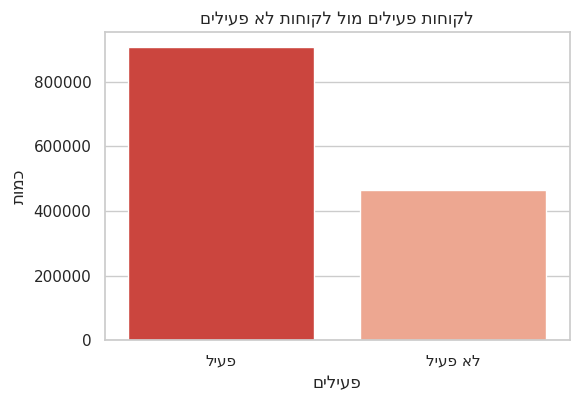

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=Costumers_Original, x='Active', palette='Reds_r')
plt.title('םיליעפ אל תוחוקל לומ םיליעפ תוחוקל')
plt.xlabel('םיליעפ')
plt.ylabel('תומכ')
plt.xticks([1, 0], ['ליעפ אל', 'ליעפ'])
plt.show()


In [ ]:
# Replace 'None'  & 'NONE' values with 'No subscription'
Costumers_Original['fashion_news_frequency'] = Costumers_Original['fashion_news_frequency'].replace('NONE', 'No subscription')
Costumers_Original['fashion_news_frequency'] = Costumers_Original['fashion_news_frequency'].replace('None', 'No subscription')

In [ ]:
news_frequency_counts = Costumers_Original['fashion_news_frequency'].value_counts()
print(news_frequency_counts)


No subscription    877713
Regularly          477416
Monthly               842
Name: fashion_news_frequency, dtype: int64


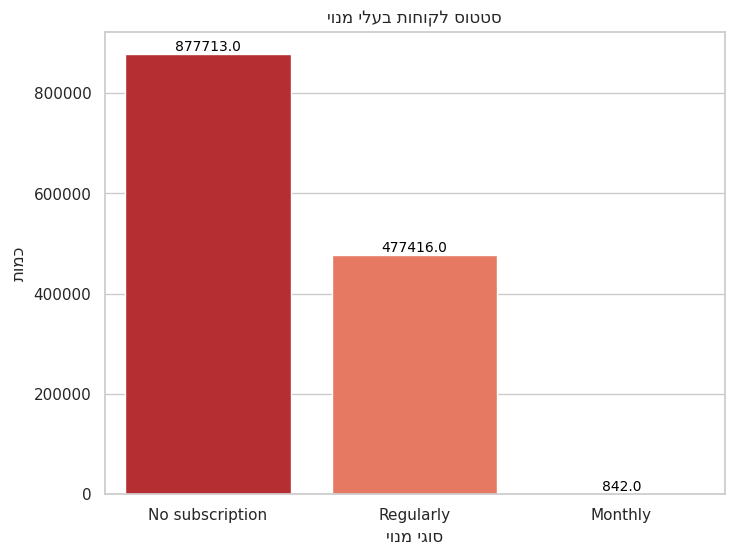

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=Costumers_Original, x='fashion_news_frequency', palette='Reds_r', order=['No subscription', 'Regularly', 'Monthly'])

# Adding numbers on top of the bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('יונמ ילעב תוחוקל סוטטס')
plt.xlabel('יונמ יגוס')
plt.ylabel('תומכ')
plt.show()


In [ ]:
club_member_counts = Costumers_Original['club_member_status'].value_counts()
print(club_member_counts)

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


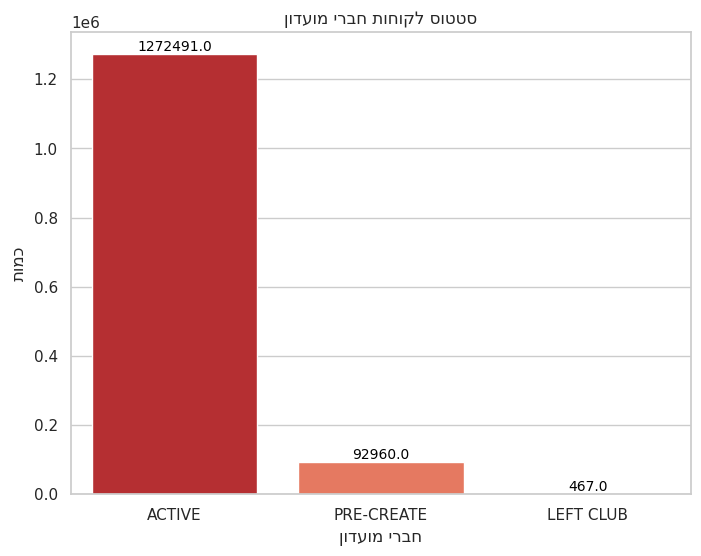

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

plot = sns.countplot(data=Costumers_Original, x='club_member_status', palette='Reds_r', order=['ACTIVE', 'PRE-CREATE', 'LEFT CLUB'])

for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('ןודעומ ירבח תוחוקל סוטטס')
plt.xlabel('ןודעומ ירבח')
plt.ylabel('תומכ')
plt.show()


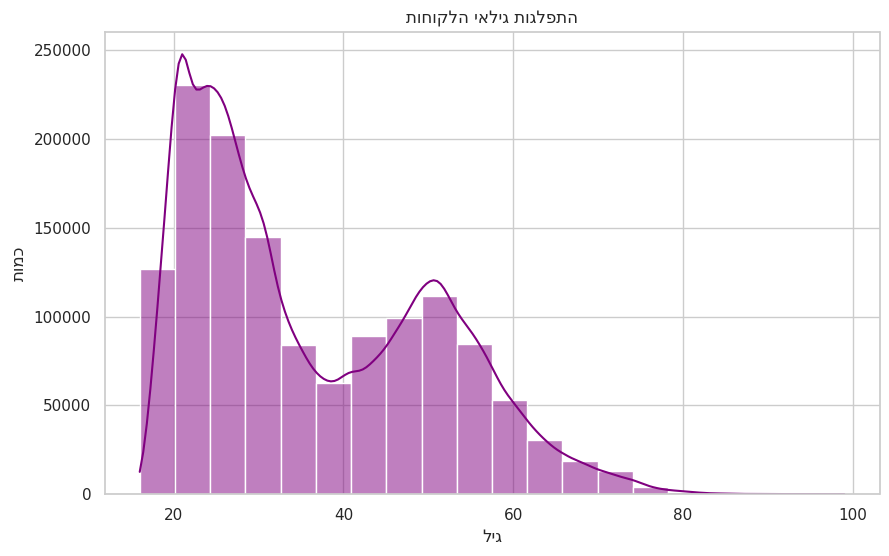

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a histogram plot for the age column
sns.histplot(data=Costumers_Original, x='age', bins=20, kde=True, color='purple')
plt.title('תוחוקלה יאליג תוגלפתה')
plt.xlabel('ליג')
plt.ylabel('תומכ')
plt.show()


In [ ]:
avg_customers_age = Costumers_Original['age'].mean()
print(avg_customers_age)
median_customers_age = Costumers_Original['age'].median()
print(median_customers_age)
oldest_customer = Costumers_Original[Costumers_Original['age'] == Costumers_Original['age'].max()].head(1)
print(oldest_customer['age'])
youngest_customer = Costumers_Original[Costumers_Original['age'] == Costumers_Original['age'].min()].head(1)
print(youngest_customer['age'])

36.386964565794
32.0
191659    99.0
Name: age, dtype: float64
1584    16.0
Name: age, dtype: float64


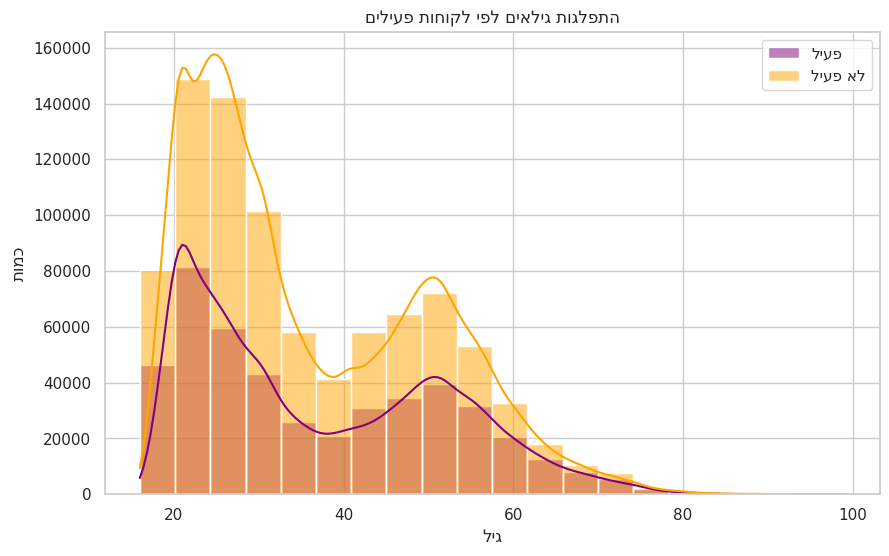

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create histograms for active and inactive customers
sns.histplot(data=Costumers_Original[Costumers_Original['Active'] == True], x='age', bins=20, kde=True, label='ליעפ', color='purple')
sns.histplot(data=Costumers_Original[Costumers_Original['Active'] == False], x='age', bins=20, kde=True, label='ליעפ אל', color='orange')

plt.title('םיליעפ תוחוקל יפל םיאליג תוגלפתה')
plt.xlabel('ליג')
plt.ylabel('תומכ')
plt.legend()
plt.show()


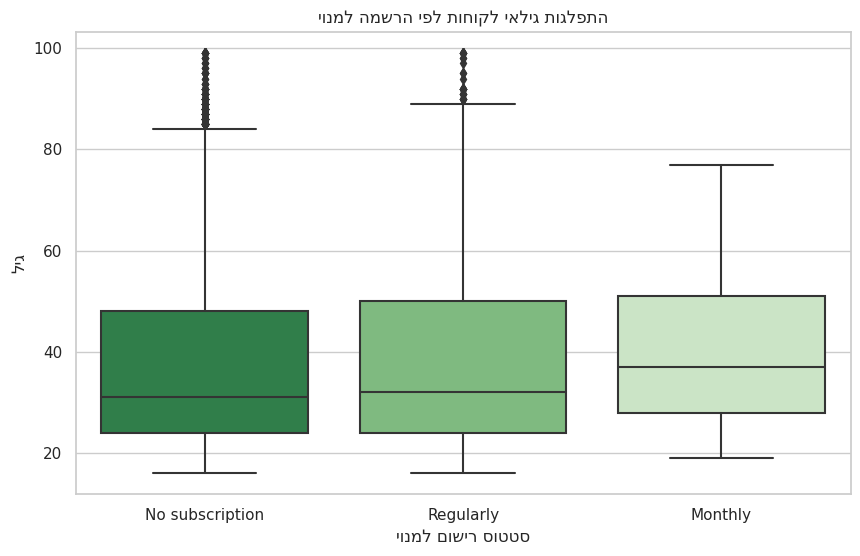

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a box plot to compare age distributions by club membership status
sns.boxplot(data=Costumers_Original, x='fashion_news_frequency', y='age', palette='Greens_r')
plt.title('יונמל המשרה יפל תוחוקל יאליג תוגלפתה')
plt.xlabel('יונמל םושיר סוטטס')
plt.ylabel('ליג')
plt.show()


#### Transactions table investigation

In [ ]:
Transactions_Original.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
len(Transactions_Original)

31788324


In [ ]:
Transactions_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
# Convert the 't_dat' column to datetime format
Transactions_Original = Transactions_Original.drop_duplicates(subset=Transactions_Original.columns.difference(['price']))

Transactions_Original['t_dat'] = pd.to_datetime(Transactions_Original['t_dat'])
Transactions_Original['price'] = np.round(Transactions_Original['price'] *1000,2)

# Calculate the earliest and latest transaction dates
earliest_date = Transactions_Original['t_dat'].min()
latest_date = Transactions_Original['t_dat'].max()
print(f"Earliest transaction date: {earliest_date}")
print(f"Latest transaction date: {latest_date}")

Earliest transaction date: 2018-09-20 00:00:00
Latest transaction date: 2020-09-22 00:00:00


In [ ]:
unique_article_ids_Prod = Products_Original['article_id'].nunique()
print("Number of unique article IDs:", unique_article_ids_Prod)
unique_article_ids_Trans = Transactions_Original['article_id'].nunique()
print("Number of unique article IDs:", unique_article_ids_Trans)
percentage_bought = (unique_article_ids_Trans / unique_article_ids_Prod)
print(percentage_bought)
percentage_not_bought = 1 -percentage_bought
print(percentage_not_bought)
diff_not_bought = (unique_article_ids_Prod - unique_article_ids_Trans)
print(diff_not_bought)



Number of unique article IDs: 105542
Number of unique article IDs: 104547
0.9905724735176518
0.009427526482348236
995


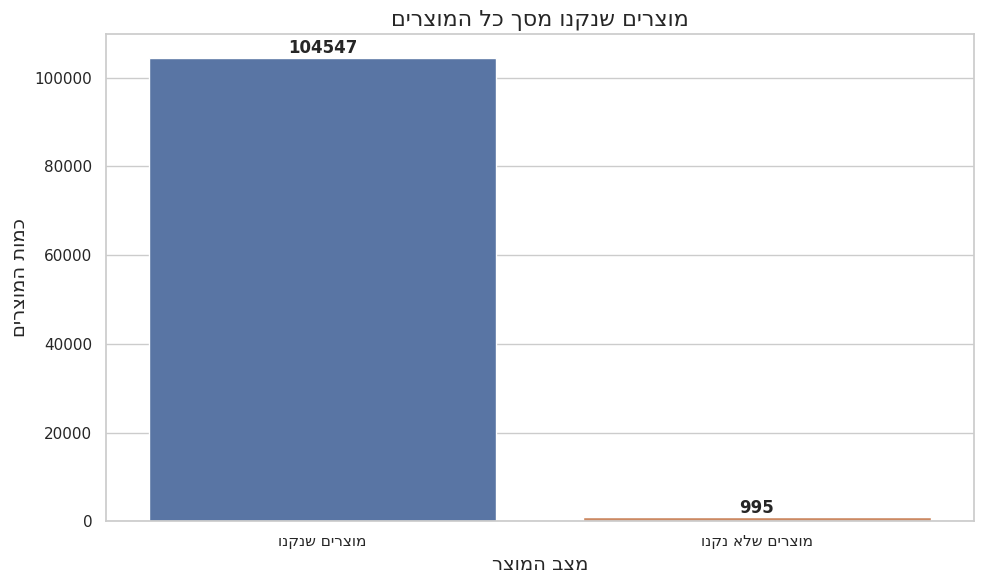

In [56]:
bought_products = unique_article_ids_Trans
not_bought_products = unique_article_ids_Prod - unique_article_ids_Trans

# Create a new figure with a white background
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
sns.barplot(x=['ונקנש םירצומ', 'ונקנ אלש םירצומ'],
            y=[bought_products, not_bought_products])

# Add data labels on the bars
for idx, value in enumerate([bought_products, not_bought_products]):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a title and labels
plt.title('םירצומה לכ ךסמ ונקנש םירצומ', fontsize=16)
plt.xlabel('רצומה בצמ', fontsize=14)
plt.ylabel('םירצומה תומכ', fontsize=14)

plt.tight_layout()


plt.show()

In [58]:
unique_costumer_ids_Cost = Costumers_Original['customer_id'].nunique()
print("Number of unique costumers IDs:", unique_costumer_ids_Cost)
unique_costumer_ids_Trans = Transactions_Original['customer_id'].nunique()
print("Number of unique article IDs:", unique_costumer_ids_Trans)
percentage_bought = (unique_costumer_ids_Trans / unique_costumer_ids_Cost)
print(percentage_bought)
percentage_not_bought = 1 -percentage_bought
print(percentage_not_bought)
diff_not_bought = (unique_costumer_ids_Cost - unique_costumer_ids_Trans)
print(diff_not_bought)


Number of unique costumers IDs: 1371980
Number of unique article IDs: 1362281
0.9929306549658158
0.007069345034184216
9699


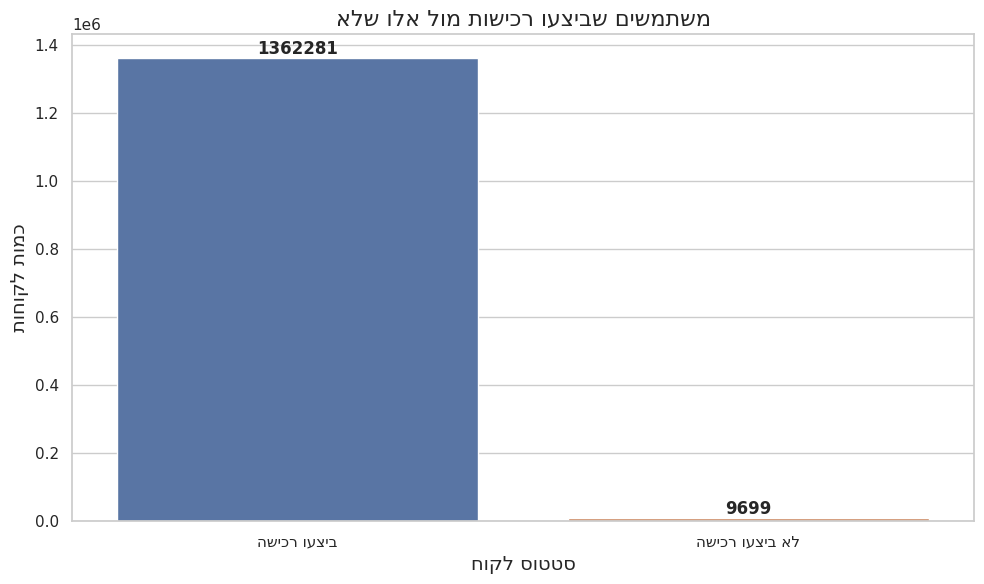

In [59]:
bought_Cost = unique_costumer_ids_Trans
not_bought_Cost = unique_costumer_ids_Cost - unique_costumer_ids_Trans

# Create a new figure with a white background
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
sns.barplot(x=['השיכר ועציב', 'השיכר ועציב אל'],
            y=[bought_Cost, not_bought_Cost])

# Add data labels on the bars
for idx, value in enumerate([bought_Cost, not_bought_Cost]):
    plt.text(idx, value + 5, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a title and labels
plt.title('אלש ולא לומ תושיכר ועציבש םישמתשמ', fontsize=16)

plt.xlabel('חוקל סוטטס', fontsize=14)
plt.ylabel('תוחוקל תומכ', fontsize=14)

plt.tight_layout()


plt.show()

In [ ]:
avg_Transactions_price = Transactions_Original['price'].mean()
print(avg_Transactions_price)
median_Transactions_price = Transactions_Original['price'].median()
print(median_Transactions_price)
max_price = Transactions_Original[Transactions_Original['price'] == Transactions_Original['price'].max()].head(1)
print(max_price['price'])
min_price = Transactions_Original[Transactions_Original['price'] == Transactions_Original['price'].min()].head(1)
print(min_price['price'])

27.743175578732476
25.41
69300    591.53
Name: price, dtype: float64
17329349    0.02
Name: price, dtype: float64


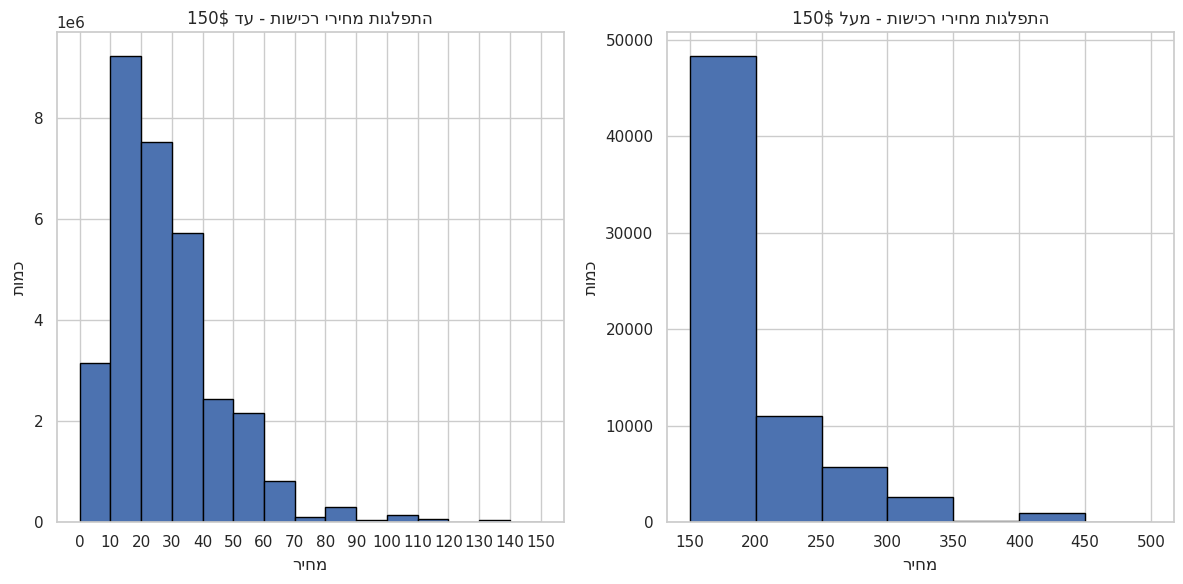

In [ ]:
plt.figure(figsize=(12, 6))

# First histogram for prices up to 200
plt.subplot(1, 2, 1)
plt.hist(Transactions_Original['price'], bins=range(0, 151, 10), edgecolor='black')
plt.title('150$ דע - תושיכר יריחמ תוגלפתה')
plt.xlabel('ריחמ')
plt.ylabel('תומכ')
plt.xticks(range(0, 151, 10))

plt.subplot(1, 2, 2)
plt.hist(Transactions_Original['price'], bins=range(150, 550,50), edgecolor='black')
plt.title('150$ לעמ - תושיכר יריחמ תוגלפתה')
plt.xlabel('ריחמ')
plt.ylabel('תומכ')
plt.xticks(range(150, 550,50))

plt.tight_layout()
plt.show()


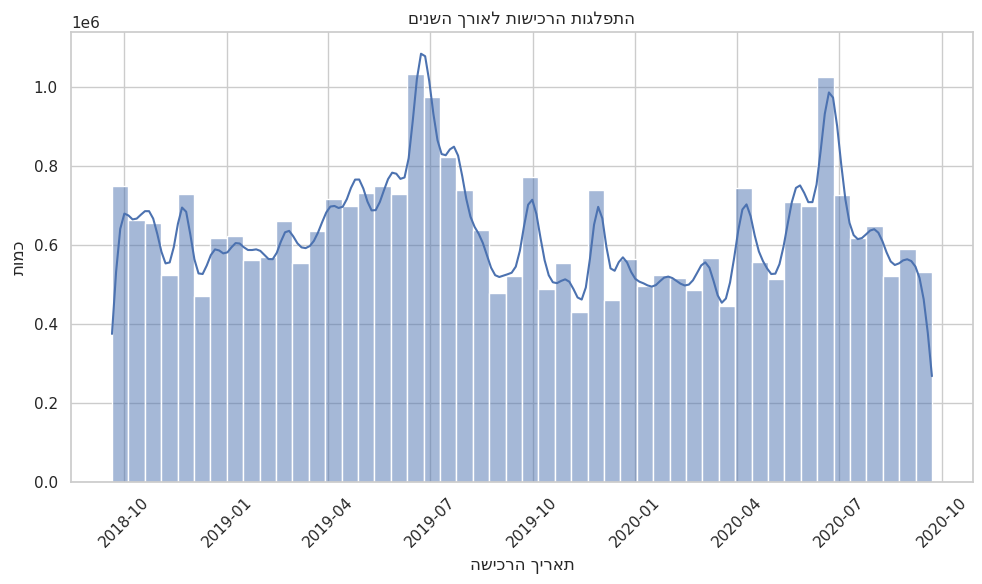

In [ ]:
plt.figure(figsize=(10, 6))

# Plot transaction distribution over time
sns.histplot(data=Transactions_Original, x='t_dat', bins=50, kde=True)
plt.title('םינשה ךרואל תושיכרה תוגלפתה')
plt.xlabel('השיכרה ךיראת')
plt.ylabel('תומכ')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


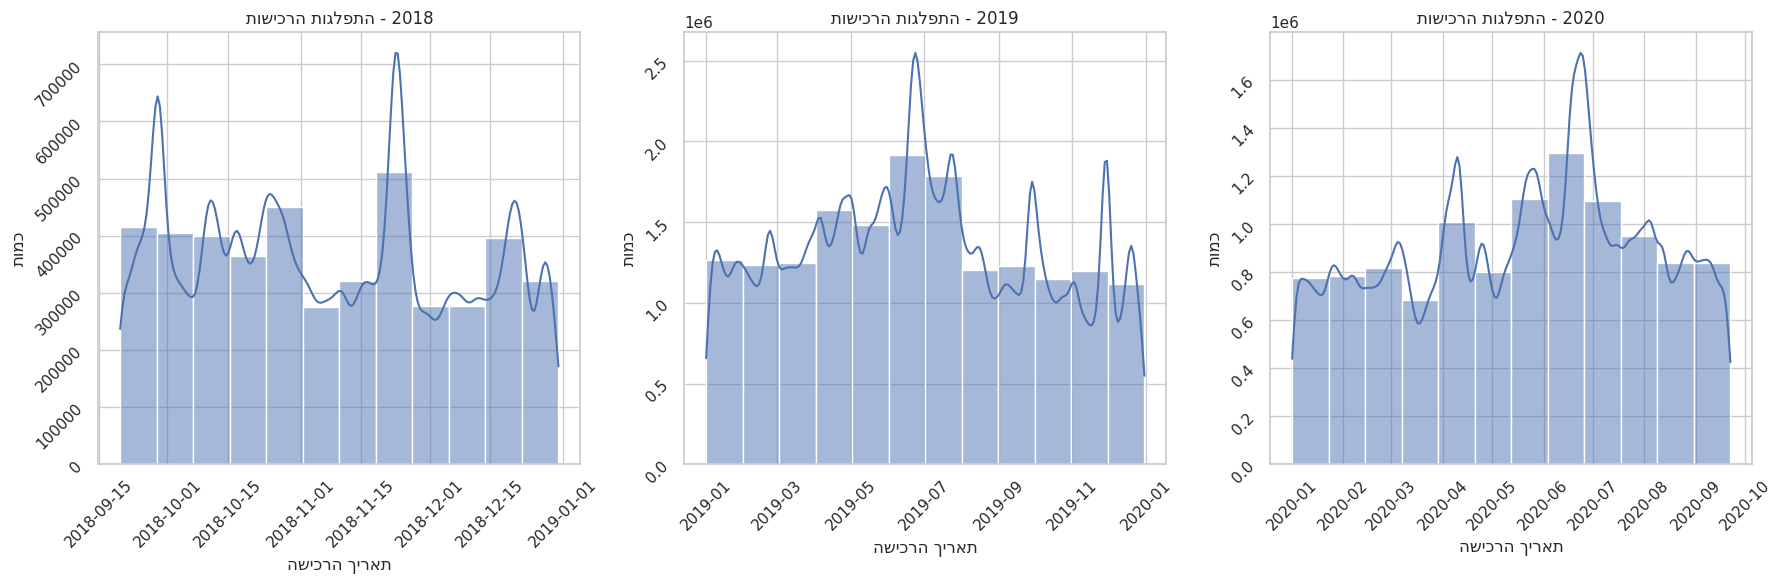

In [ ]:
transactions_2018 = Transactions_Original[Transactions_Original['t_dat'].dt.year == 2018]
transactions_2019 = Transactions_Original[Transactions_Original['t_dat'].dt.year == 2019]
transactions_2020 = Transactions_Original[Transactions_Original['t_dat'].dt.year == 2020]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot transaction distribution for each year with monthly bins
sns.histplot(data=transactions_2018, x='t_dat', bins=12, kde=True, ax=axs[0])
axs[0].set_title('תושיכרה תוגלפתה - 2018')
axs[0].set_xlabel('השיכרה ךיראת')
axs[0].set_ylabel('תומכ')
axs[0].tick_params(rotation=45)

sns.histplot(data=transactions_2019, x='t_dat', bins=12, kde=True, ax=axs[1])
axs[1].set_title('תושיכרה תוגלפתה - 2019')
axs[1].set_xlabel('השיכרה ךיראת')
axs[1].set_ylabel('תומכ')
axs[1].tick_params(rotation=45)

sns.histplot(data=transactions_2020, x='t_dat', bins=12, kde=True, ax=axs[2])
axs[2].set_title('תושיכרה תוגלפתה - 2020')
axs[2].set_xlabel('השיכרה ךיראת')
axs[2].set_ylabel('תומכ')
axs[2].tick_params(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
Products_desired_columns = ['article_id','prod_name','product_type_name','product_group_name','graphical_appearance_name',
                   'perceived_colour_master_name','index_group_name','section_name']
Products_to_merge = Products_Original[Products_desired_columns].copy()
Costumers_desired_columns = ['customer_id','Active','age']
Costumers_to_merge = Costumers_Original[Costumers_desired_columns].copy()
Transactions_desired_columns = ['t_dat','customer_id','article_id','price']
Transactions_to_merge = Transactions_Original[Transactions_desired_columns].copy()
merge_data = pd.merge(Transactions_to_merge, Costumers_to_merge, on='customer_id')
merge_data = pd.merge(merge_data, Products_to_merge, on='article_id')
merge_data.head(1)


,t_dat,customer_id,article_id,price,Active,age,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_master_name,index_group_name,section_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,50.83,0.0,24.0,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,Ladieswear,Womens Lingerie


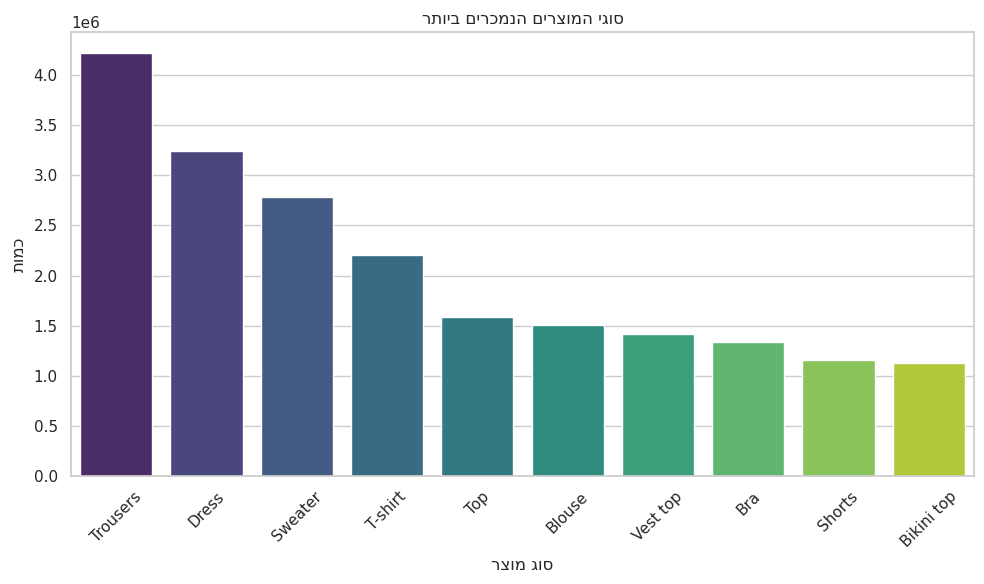

In [ ]:
top_10_products = merge_data['product_type_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')

plt.xlabel('רצומ גוס')
plt.ylabel('תומכ')
plt.title('רתויב םירכמנה םירצומה יגוס')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


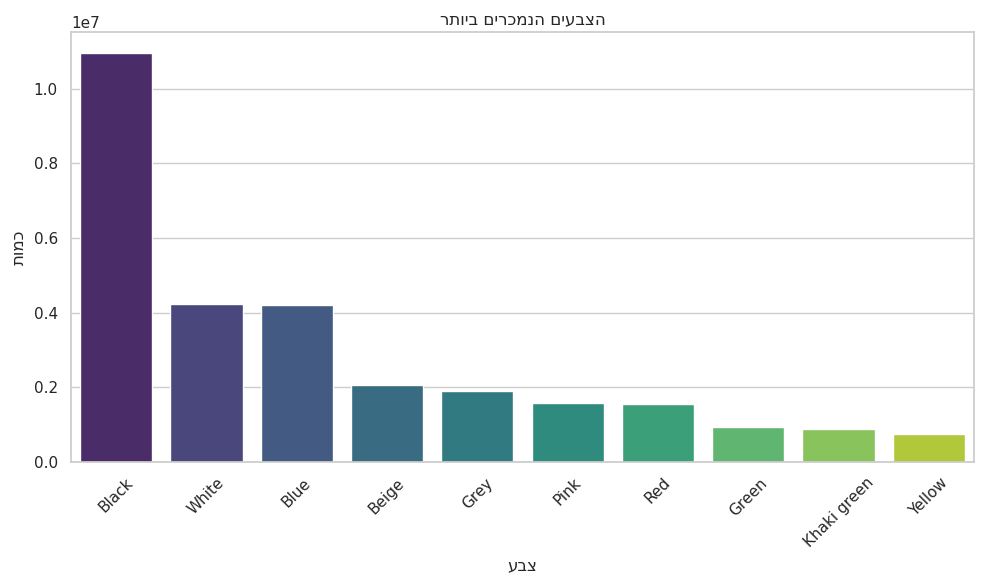

In [ ]:
top_10_colours = merge_data['perceived_colour_master_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_colours.index, y=top_10_colours.values, palette='viridis')

plt.xlabel('עבצ')
plt.ylabel('תומכ')
plt.title('רתויב םירכמנה םיעבצה')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
transactions_per_day = merge_data.groupby(merge_data['t_dat'].dt.date)['customer_id'].count()
avg_transactions_per_day = transactions_per_day.mean()
transactions_per_week = merge_data.groupby(merge_data['t_dat'].dt.strftime('%Y-%U'))['customer_id'].count()
avg_transactions_per_week = transactions_per_week.mean()
transactions_per_month = merge_data.groupby(merge_data['t_dat'].dt.strftime('%Y-%m'))['customer_id'].count()
avg_transactions_per_month = transactions_per_month.mean()

print("Average Transactions Per Day:", avg_transactions_per_day)
print("Average Transactions Per Week:", avg_transactions_per_week)
print("Average Transactions Per Month:", avg_transactions_per_month)


Average Transactions Per Day: 43308.34332425068
Average Transactions Per Week: 294336.3333333333
Average Transactions Per Month: 1271532.96


Part 2 - Data **preparation**

Product Table Preparation

In [ ]:
desired_columns = ['article_id', 'perceived_colour_master_name','index_group_name']
Products_limited = Products_Original[desired_columns].copy()
Products_limited.head()

,article_id,perceived_colour_master_name,index_group_name
0,108775015,Black,Ladieswear
1,108775044,White,Ladieswear
2,108775051,White,Ladieswear
3,110065001,Black,Ladieswear
4,110065002,White,Ladieswear


In [ ]:
unique_counts = {}

columns_to_count = [
    'perceived_colour_master_name',
     'index_group_name'
]

for column in columns_to_count:
    unique_counts[column] = len(Products[column].unique())

print(unique_counts)


{'perceived_colour_master_name': 20, 'index_group_name': 5}


In [ ]:
product_features = pd.get_dummies(Products_limited[['perceived_colour_master_name', 'index_group_name']], drop_first=True)
product_features['article_id'] = Products_limited['article_id']
product_features.head(2)


,perceived_colour_master_name_Black,perceived_colour_master_name_Blue,perceived_colour_master_name_Bluish Green,perceived_colour_master_name_Brown,perceived_colour_master_name_Green,perceived_colour_master_name_Grey,perceived_colour_master_name_Khaki green,perceived_colour_master_name_Lilac Purple,perceived_colour_master_name_Metal,perceived_colour_master_name_Mole,...,perceived_colour_master_name_Unknown,perceived_colour_master_name_White,perceived_colour_master_name_Yellow,perceived_colour_master_name_Yellowish Green,perceived_colour_master_name_undefined,index_group_name_Divided,index_group_name_Ladieswear,index_group_name_Menswear,index_group_name_Sport,article_id
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,108775015
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,108775044


Costumers Table *Feature Engineering*

In [ ]:
Costumers_Original.head(1)
Costumers = Costumers_Original.drop(["FN",'postal_code'],axis =1)
Costumers.head(1)

,customer_id,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,ACTIVE,No subscription,49.0


In [ ]:
# One-hot encode categorical columns
customer_features = pd.get_dummies(Costumers[['club_member_status', 'fashion_news_frequency']], drop_first=True)
# Add customer_id and Active columns to the customer_features DataFrame
customer_features['customer_id'] = Costumers['customer_id']
customer_features['Active'] = Costumers['Active']
customer_features.head(1)

,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_No subscription,fashion_news_frequency_Regularly,customer_id,Active
0,0,0,1,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0


In [ ]:
# Categorize customers into age groups
def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif age > 20 and age <30:
        return '20-30'
    elif age > 30 and age <40:
        return '30-40'
    elif age > 40 and age <50:
        return '40-50'
    elif age > 50 and age <60:
        return '50-60'
    elif age > 60 and age <80:
        return '60-80'
    else:
        return '80+'

Costumers['age_group'] = Costumers['age'].apply(categorize_age)
age_group_features = pd.get_dummies(Costumers['age_group'], prefix='age', drop_first=True)


In [ ]:
customer_features = pd.concat([customer_features, age_group_features], axis=1)
customer_features.head(1)

,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_No subscription,fashion_news_frequency_Regularly,customer_id,Active,age_30-40,age_40-50,age_50-60,age_60-80,age_80+,age_Under 20
0,0,0,1,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0,1,0,0,0,0


In [ ]:
Transactions_Original.head(1)
Transactions = Transactions_Original.drop('sales_channel_id',axis =1)
Transactions.head(1)

,t_dat,customer_id,article_id,price
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,50.83


In [ ]:
Transactions.sort_values(by=['customer_id', 't_dat'], inplace=True)

# Calculate the time difference between consecutive purchases for each customer
Transactions['time_diff'] = Transactions.groupby('customer_id')['t_dat'].diff()
Transactions['time_diff'] =Transactions['time_diff'].dt.days
Transactions['time_diff'].fillna(0, inplace=True)

Feature Engineering - building Interaction Features

In [ ]:
transactions_summary = Transactions.groupby(['customer_id', 'article_id']).agg(
    product_num_transactions=('article_id', 'count'),
    total_spent_on_product=('price', 'sum'),
).reset_index()

#transactions_summary = transactions_summary.sort_values(by='product_num_transactions', ascending=False)

transactions_summary['total_num_transactions'] = transactions_summary.groupby('customer_id')['product_num_transactions'].transform('sum')
transactions_summary['total_spent'] = transactions_summary.groupby('customer_id')['total_spent_on_product'].transform('sum')
transactions_summary['avg_days_between_transaction'] = Transactions.groupby('customer_id')['time_diff'].transform('mean')


transactions_summary = transactions_summary[transactions_summary['total_num_transactions'] > 500]


In [ ]:
Products_type = Products_Original[['article_id','product_type_name']]
transactions_summary = pd.merge(transactions_summary, Products_type, on='article_id')


In [ ]:
transactions_summary['product_type_count'] = transactions_summary.groupby(['customer_id', 'product_type_name'])['product_num_transactions'].transform('sum')
transactions_summary.head(5)

,customer_id,article_id,product_num_transactions,total_spent_on_product,total_num_transactions,total_spent,avg_days_between_transaction,product_type_name,product_type_count
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,179393018,1,13.54,622,23541.03,22.500000,Socks,12
1,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,179393018,1,13.54,1225,26819.24,6.404255,Socks,6
2,4d394406bdef74c0a11f9b4e791c7d95df3369a7c387af...,179393018,1,13.54,536,19262.46,6.805825,Socks,4
3,a38261c1584aede7d89d33634cfa9da83c2b7a5662da9a...,179393018,1,5.07,594,15249.28,NaN,Socks,2
4,e5ebe09835a61c34decfeba6b5331ea241d80184802acd...,179393018,1,13.54,616,20693.76,6.563218,Socks,22


In [ ]:
transactions_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129362 entries, 0 to 129361
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   customer_id                   129362 non-null  object 
 1   article_id                    129362 non-null  int64  
 2   product_num_transactions      129362 non-null  int64  
 3   total_spent_on_product        129362 non-null  float64
 4   total_num_transactions        129362 non-null  int64  
 5   total_spent                   129362 non-null  float64
 6   avg_days_between_transaction  116465 non-null  float64
 7   product_type_name             129362 non-null  object 
 8   product_type_count            129362 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.9+ MB


In [ ]:
transactions_summary['avg_days_between_transaction'].fillna(0, inplace=True)

In [ ]:
unique_customers = transactions_summary['customer_id'].unique()
unique_articles = transactions_summary['article_id'].unique()

cross_join = pd.DataFrame({'customer_id': unique_customers})
cross_join['key'] = 1
cross_join = cross_join.merge(pd.DataFrame({'article_id': unique_articles, 'key': 1}), on='key', how='outer')
cross_join.drop('key', axis=1, inplace=True)

transactions_features = cross_join.merge(transactions_summary, on=['customer_id', 'article_id'], how='left')


In [ ]:
transactions_features.head(2)

,customer_id,article_id,product_num_transactions,total_spent_on_product,total_num_transactions,total_spent,avg_days_between_transaction,product_type_name,product_type_count
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,179393018,1.0,13.54,622.0,23541.03,22.500000,Socks,12.0
1,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,186372045,1.0,13.42,622.0,23541.03,15.020833,Trousers,104.0


In [ ]:
transactions_features = pd.merge(transactions_features, Products_type, on='article_id')

In [ ]:
# Drop the 'product_type_name_x' column
transactions_features = transactions_features.drop('product_type_name_x', axis=1)

# Rename the 'product_type_name_y' column to 'product_type_name'
transactions_features = transactions_features.rename(columns={'product_type_name_y': 'product_type_name'})


In [ ]:
transactions_features['product_num_transactions'].fillna(0, inplace=True)
transactions_features['total_spent_on_product'].fillna(0, inplace=True)

In [ ]:
transactions_features['total_num_transactions'].fillna(transactions_features.groupby('customer_id')['total_num_transactions'].transform('first'), inplace=True)
transactions_features['total_spent'].fillna(transactions_features.groupby('customer_id')['total_spent'].transform('first'), inplace=True)
transactions_features['avg_days_between_transaction'].fillna(transactions_features.groupby('customer_id')['avg_days_between_transaction'].transform('first'), inplace=True)
transactions_features['product_type_count'].fillna(transactions_features.groupby(['customer_id', 'product_type_name'])['product_type_count'].transform('first'), inplace=True)


In [ ]:
transactions_features['product_type_count'].fillna(0, inplace=True)

In [ ]:
null_counts = transactions_features.isnull().sum()
null_counts

customer_id                     0
article_id                      0
product_num_transactions        0
total_spent_on_product          0
total_num_transactions          0
total_spent                     0
avg_days_between_transaction    0
product_type_count              0
product_type_name               0
dtype: int64

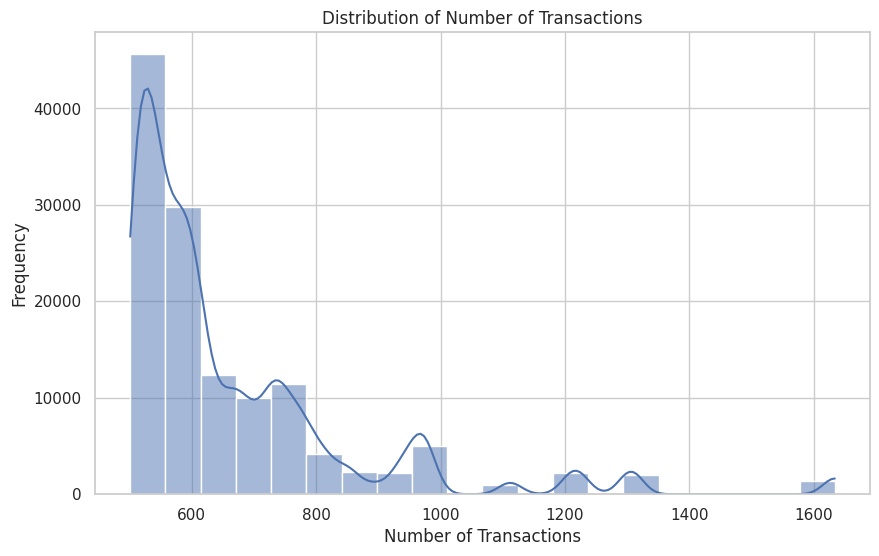

In [ ]:
# Create a distribution plot (histogram) for 'num_transactions'
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_summary, x='total_num_transactions', bins=20, kde=True)
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Transactions')
plt.show()


In [ ]:
# merging the tables
interaction_data = pd.merge(transactions_features, customer_features, on='customer_id')
interaction_data = pd.merge(interaction_data, product_features, on='article_id')

In [ ]:
len(interaction_data)

9873060

In [ ]:
interaction_data = pd.get_dummies(interaction_data, columns=['product_type_name'])
interaction_data.head(1)

,customer_id,article_id,product_num_transactions,total_spent_on_product,total_num_transactions,total_spent,avg_days_between_transaction,product_type_count,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,...,product_type_name_Underwear corset,product_type_name_Underwear set,product_type_name_Unknown,product_type_name_Vest top,product_type_name_Wallet,product_type_name_Watch,product_type_name_Waterbottle,product_type_name_Wedge,product_type_name_Weekend/Gym bag,product_type_name_Wood balls
0,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,179393018,1.0,13.54,622.0,23541.03,22.5,12.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# בעצם כאן אנחנו מחשבים את המחיר הממוצע של העסקאות עבור כל לקוח
# הפיצ'ר הזה יכול לספק לנו תובנות לגבי התנהגות ההוצאות האופיינית של הלקוח והעדפות הרכישה שלו.
interaction_data['avg_transaction_price'] = interaction_data['total_spent'] / interaction_data['total_num_transactions']

In [ ]:
# חישוב אחוז האינטראקציה בין המשתמש למוצר. אחוז אינטראקציה גבוה יותר עשוי להצביע על כך שלקוח רוכש פריטים לעתים קרובות, מה שמעיד על מעורבות חזקה עם המוצרים.
interaction_data['product_relative_percentage'] = interaction_data['product_num_transactions'] / interaction_data['total_num_transactions']

In [ ]:
# חישוב אחוז האינטראקציה בין המשתמש לסוג המוצר. אחוז אינטראקציה גבוה יותר עשוי להצביע על כך שלקוח רוכש פריטים מסוג זה לעתים קרובות, מה שמעיד על מעורבות חזקה עם סוג המוצר.
# זו גם תהיה העמודה שנרצה לחזות - בחרנו לחשב את אחוז המוצרים היחסי שנקנה ע"י הלקוח מסך כל המוצרים שקנה
interaction_data['product_type_relative_percentage'] = interaction_data['product_type_count'] / interaction_data['total_num_transactions']

In [ ]:
interaction_data = interaction_data.drop(['product_num_transactions', 'product_type_count'], axis=1)

In [ ]:
customer_ids_to_extract = [
    "0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94",
    "e5ebe09835a61c34decfeba6b5331ea241d80184802acd6f5de65ba87b12f36f"
]
predictions_data = interaction_data[interaction_data['customer_id'].isin(customer_ids_to_extract)]

# Remove the selected rows from the original DataFrame
interaction_data = interaction_data[~interaction_data['customer_id'].isin(customer_ids_to_extract)]

# Now 'selected_rows' contains the rows with the specified customer IDs,
# and 'interaction_data' contains the remaining rows.


In [ ]:
interaction_data = interaction_data.set_index(['customer_id', 'article_id'])
predictions_data = predictions_data.set_index(['customer_id', 'article_id'])

In [ ]:
duplicate_count = interaction_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [ ]:
interaction_data.drop_duplicates(inplace=True)
predictions_data.drop_duplicates(inplace=True)

In [ ]:
# sample_size = 10000
# sample_data = interaction_data.sample(n=sample_size, random_state=42)

In [ ]:
# נבודד את משתנה המטרה שלנו
target_variable = interaction_data['product_type_relative_percentage']
interaction_data = interaction_data.drop(columns=['product_type_relative_percentage'],axis =1)

In [ ]:
# נבודד את משתנה המטרה שלנו
predict_target_variable = predictions_data['product_type_relative_percentage']
predictions_data = predictions_data.drop(columns=['product_type_relative_percentage'],axis =1)

In [ ]:
# # נבודד את משתנה המטרה שלנו
# target_sample = sample_data['product_type_relative_percentage']
# sample_data = sample_data.drop(columns=['product_type_relative_percentage'],axis =1)

In [ ]:
target_variable = target_variable*100
predict_target_variable = predict_target_variable*100

In [ ]:
# כעת ננרמל ונעשה סקיילינג לנתונים
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten
from tensorflow.keras.models import Model
scaler = MinMaxScaler()
interaction_data = scaler.fit_transform(interaction_data)


In [ ]:
# כעת ננרמל ונעשה סקיילינג לנתונים
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten
from tensorflow.keras.models import Model
scaler = MinMaxScaler()
predictions_data = scaler.fit_transform(predictions_data)


In [ ]:
from sklearn.model_selection import train_test_split
#פיצול סט הנתונים לסט אימונים וסט מבחן
X_train, X_test, y_train ,y_test  = train_test_split(interaction_data,target_variable, test_size=0.2, random_state=42)
#פיצול נוסף לסט אימונים וסט ולידציה
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

 part 3 - building the model architecture

In [ ]:
def build_model(X_train, y_train, X_val=None, y_val=None, num_units=128, num_layers=1, activation='linear', dropout_rate=0.0, l1_reg=0.0, l2_reg=0.0,
                optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'], epochs=20, use_early_stopping=True):
    # יצירת המודל
    model = Sequential()
            # Input layer
    # כאן אני מוסיף שכבה ראשונה למודל כאשר הפרמטר הראשון זה מספר הנוירונים בשכבה, הפרמטר השני זה פונקציית האקטיבציה
    #רגולציה L1 ו-L2
    model.add(Dense(num_units, activation=activation, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
            # Hidden layers
    # פה אני יוצר לולאה שמוסיפה שכבות נוספות למודל, בהתבססות על הפרמטר num layers
    for _ in range(num_layers - 1):
        model.add(Dense(num_units, activation=activation, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(Dropout(dropout_rate))
        # Output layer
    # כאן זו השכבה האחרונה במודל כלומר השכבה הסופית עם פלט של התוצאה עבור האינטראקציה בין המוצר ללקוח
    #בגדול השכבה הזאת תוציא ציוני הסתברות עבור האינטראקציה בין המוצר ללקוח
    model.add(Dense(1, activation='linear'))

    # קופילציה - מציין את האופטימיזציה, פונקציית השגיאה, ומדדי הערכה של המודל
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # כאן אני יוצר מנגנון שעוקב אחרי פונקציית השגיאה של סט הולידציה במהלך האימון. אם השגיאה של הולידציה לא משתפרת עבור מספר איפוקים האימון ייפסק
    callbacks = []
    if use_early_stopping and X_val is not None and y_val is not None:
        early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
        callbacks.append(early_stopping)

    # אימון המודל - שומר את היסטוריית האימון (ערכי שגיאה ודיוק על כל תקופה)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, callbacks=callbacks, validation_data=(X_val, y_val) if X_val is not None and y_val is not None else None)

    return model, history


In [ ]:
   # יצירת ספרייה עם כל ההיפר פרמטרים שאני רוצה לבדוק
param_grid = {
        #מספר הנוירונים
    'num_units': [128],
        #מספר השכבות
    'num_layers': [1],
        #פונקציות אקטיבציה
    'activation': ['linear'],
        #הסתברות לדרופ
    'dropout_rate': [0.3],
        #רגולציה
    'l1_reg': [0.005],
    'l2_reg': [0.005],
        #אופטימזציות
    'optimizer': ['rmsprop'],
        #פונקציות שגיאה (מדובר במודל רגרסיה ולכן זו הפונקציה המתאימה)
    'loss': ['mse'],
        # הגדרת מדד ביצוע mse
    'metrics':["mse"],
    # הגדרת מספר איפוקים
    'epochs':[20]
}

In [ ]:
from sklearn.model_selection import train_test_split, ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
from keras.models import Sequential
from keras.layers import Dense, Dropout
# יוצר משתנה שישמש למעקב אחר הציון הטוב ביותר במהלך האימון
best_score = 0.0
# יוצר מילון כדי לאחסן את הפרמטרים שהביאו לתוצאות הטובות ביותר
best_params = {}
# מאתחל מילון כדי לאחסן את היסטוריית האימונים של המודל בעל הביצועים הטובים ביותר
best_history = {}
# יוצר פונקציית מעקב אחר הבדיקה של המודל (סתם שאני אדע מה קורה בעת ההרצה)
best_mse = 1000000
total_configs = len(list(ParameterGrid(param_grid)))
config_count = 0
# לולאה שבודקת את כל השילובים של הפרמטרים מהפראם גריד
for params in ParameterGrid(param_grid):
    #מדפיס מידע על הארכיטקטורה שנבדקת
    config_count += 1
    print(f"Testing configuration {config_count}/{total_configs}")
    print(f"Current parameters: {params}")
    #קורא לפונקציה של יצירת מודל עם קבוצת הפרמטרים הנוכחית
    model, history = build_model(X_train, y_train, X_val, y_val, **params)
     # מחשב את השגיאה על סט הולידציה
    val_mse = history.history['val_mse'][-1]
    # תנאי שאם הציון של האימון הנוכחי טוב יותר מהקודם אני מעדכן את המשתנים בספריות עד שלבסוף אני מוצא את הפרמטרים הטובים ביותר
    if val_mse <  best_mse:
        best_mse = val_mse
        best_params = params
        best_history = history

# הדפסת מידע על הפרמטרים הטובים ביותר בעד השלב הנוכחי
    print(f"Best parameters so far: {best_params}")
    print(f"Best MSE so far: {best_mse}")
    print("=" * 40)
# הדפסת התוצאה הסופית של הפרמטרים הטובים ביותר שנמצאו והתוצאה שלהם
print("Grid search complete!")
print("Best Parameters: ", best_params)
print("Best MSE: ", best_mse)

Testing configuration 1/1
Current parameters: {'activation': 'linear', 'dropout_rate': 0.3, 'epochs': 20, 'l1_reg': 0.005, 'l2_reg': 0.005, 'loss': 'mse', 'metrics': 'mse', 'num_layers': 1, 'num_units': 128, 'optimizer': 'rmsprop'}
Epoch 1/20
6966/6966 [==============================] - 18s 2ms/step - loss: 10.8154 - mse: 9.6445 - val_loss: 9.6548 - val_mse: 8.9579
Epoch 2/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.6965 - mse: 9.1482 - val_loss: 9.5555 - val_mse: 9.0916
Epoch 3/20
6966/6966 [==============================] - 16s 2ms/step - loss: 9.5628 - mse: 9.1425 - val_loss: 9.4196 - val_mse: 9.0396
Epoch 4/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.4775 - mse: 9.1222 - val_loss: 9.2722 - val_mse: 8.9378
Epoch 5/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.4238 - mse: 9.1096 - val_loss: 9.3871 - val_mse: 9.0846
Epoch 6/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.3839 - mse: 9

In [ ]:
# בגלל שעבדנו עם גוגל קולב - לא רצינו להריץ כל פעם מחדש את הריצה עם כל הפרמטרים, לכן שינינו את הגריד שיחזיק בתוכו רק את הפרמטרים הטובים ביותר ואז הרצנו כל פעם את הקטע קוד הזה
# יוצר משתנה שישמש למעקב אחר הציון הטוב ביותר במהלך האימון
best_score = 0.0
# יוצר מילון כדי לאחסן את הפרמטרים שהביאו לתוצאות הטובות ביותר
best_params = {}
# מאתחל מילון כדי לאחסן את היסטוריית האימונים של המודל בעל הביצועים הטובים ביותר
best_history = {}
# יוצר פונקציית מעקב אחר הבדיקה של המודל (סתם שאני אדע מה קורה בעת ההרצה)
best_mse = 1000000
total_configs = len(list(ParameterGrid(param_grid)))
config_count = 0
# לולאה שבודקת את כל השילובים של הפרמטרים מהפראם גריד
for params in ParameterGrid(param_grid):
    #מדפיס מידע על הארכיטקטורה שנבדקת
    config_count += 1
    print(f"Testing configuration {config_count}/{total_configs}")
    print(f"Current parameters: {params}")
    #קורא לפונקציה של יצירת מודל עם קבוצת הפרמטרים הנוכחית
    model, history = build_model(X_train, y_train, X_val, y_val, **params)
     # מחשב את הדיוק על סט הולידציה
    val_mse = history.history['val_mse'][-1]
    # תנאי שאם הציון של האימון הנוכחי טוב יותר מהקודם אני מעדכן את המשתנים בספריות עד שלבסוף אני מוצא את הפרמטרים הטובים ביותר
    if val_mse <  best_mse:
        best_mse = val_mse
        best_params = params
        best_history = history

# הדפסת מידע על הפרמטרים הטובים ביותר בעד השלב הנוכחי
    print(f"Best parameters so far: {best_params}")
    print(f"Best MSE so far: {best_mse}")
    print("=" * 40)
# הדפסת התוצאה הסופית של הפרמטרים הטובים ביותר שנמצאו והתוצאה שלהם
print("Grid search complete!")
print("Best Parameters: ", best_params)
print("Best MSE: ", best_mse)

Testing configuration 1/1
Current parameters: {'activation': 'linear', 'dropout_rate': 0.3, 'epochs': 20, 'l1_reg': 0.005, 'l2_reg': 0.005, 'loss': 'mse', 'metrics': 'mse', 'num_layers': 1, 'num_units': 128, 'optimizer': 'rmsprop'}
Epoch 1/20
6966/6966 [==============================] - 22s 3ms/step - loss: 10.8211 - mse: 9.6473 - val_loss: 9.7214 - val_mse: 9.0343
Epoch 2/20
6966/6966 [==============================] - 19s 3ms/step - loss: 9.7235 - mse: 9.1663 - val_loss: 9.4271 - val_mse: 8.9538
Epoch 3/20
6966/6966 [==============================] - 19s 3ms/step - loss: 9.5717 - mse: 9.1414 - val_loss: 9.2982 - val_mse: 8.8999
Epoch 4/20
6966/6966 [==============================] - 18s 3ms/step - loss: 9.4788 - mse: 9.1190 - val_loss: 9.5979 - val_mse: 9.2500
Epoch 5/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.4236 - mse: 9.1085 - val_loss: 9.2416 - val_mse: 8.9448
Epoch 6/20
6966/6966 [==============================] - 17s 2ms/step - loss: 9.3772 - mse: 9

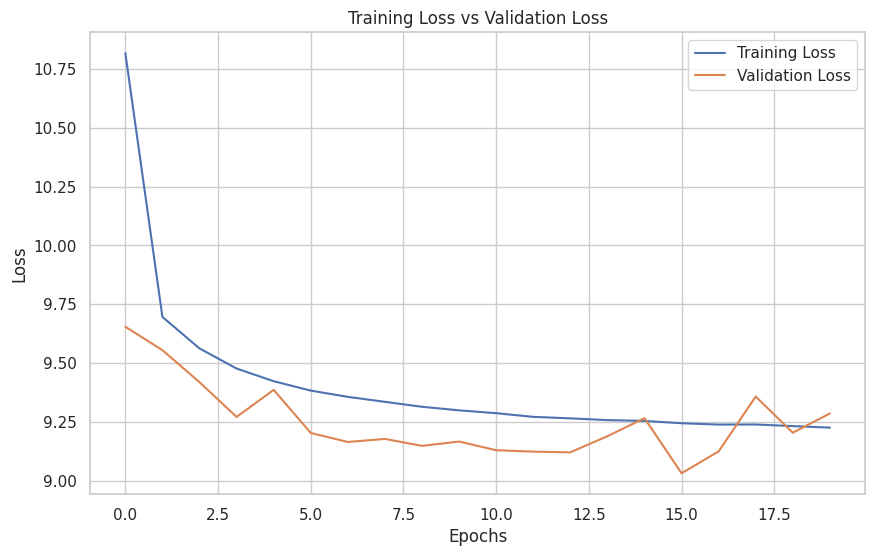

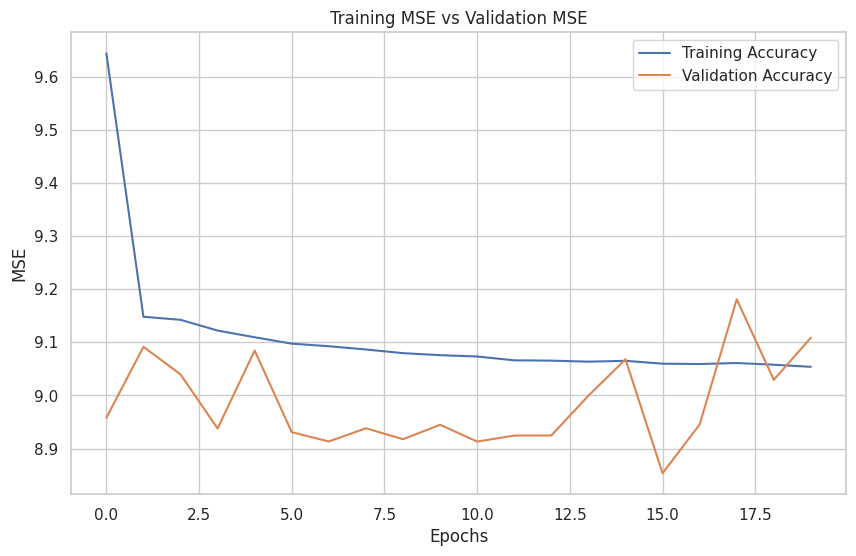

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# לאחר שמצאנו את ההיפרפרמטרים וגודל הרשת שהביאו לתוצאה הטובה ביותר, אני לבדוק האם ניתן למנוע התאמת יתר ע"י הגבלת מספר האיפוקים
#model, history = build_model(X_train, y_train, X_val, y_val, **best_params)
#  תרשים שמציג את התקדמות פונקציית השגיאה לאורך האימון (כפי שהוצג בכיתה)
def plot_loss(history):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.legend()
    plt.show()

# תרשים שמציג את התקדמות מדד הדיוק לאורך האימון
def plot_accuracy(history):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mse'], label='Training Accuracy')
    plt.plot(history.history['val_mse'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Training MSE vs Validation MSE')
    plt.legend()
    plt.show()

plot_loss(history)
plot_accuracy(history)


In [ ]:
best_params['epochs'] = 5
model, history = build_model(X_test, y_test, use_early_stopping=False, **best_params)

Epoch 1/5
2177/2177 [==============================] - 5s 2ms/step - loss: 12.7187 - mse: 10.8102
Epoch 2/5
2177/2177 [==============================] - 5s 2ms/step - loss: 10.1703 - mse: 9.2044
Epoch 3/5
2177/2177 [==============================] - 4s 2ms/step - loss: 9.9475 - mse: 9.2022
Epoch 4/5
2177/2177 [==============================] - 5s 2ms/step - loss: 9.8087 - mse: 9.1810
Epoch 5/5
2177/2177 [==============================] - 4s 2ms/step - loss: 9.7251 - mse: 9.1746


In [ ]:
#יצירת מערכת ההמלצה בעזרת המודל המאומן שיצרנו
import random

def recommendation_system(predictions, target_label, Products_type):
    # מבצע תחזיות ויוצרים טבלה
    predictions = model.predict(predictions_data)
    predictions = predictions.flatten()
    predictions_df = pd.DataFrame({'predictions': predictions})

    predict_target_variable_df = target_label.reset_index()

    # איחוד התחזיות עם הטבלה של מזהה המוצר ומזהה הלקוח ולאחר מכן מיון הטבלה לפי הציוני הפרדיקציה
    combined_df = pd.concat([predict_target_variable_df, predictions_df], axis=1)
    sorted_df = combined_df.sort_values(by='predictions', ascending=False)

    # איחוד הטבלה עם טבלת המוצרים והסרת כפילויות (הוצאנו את מזהה המוצר)
    result_df = sorted_df.merge(Products_type, on='article_id', how='left')
    result_df.drop(columns=['article_id'], inplace=True)
    result_df.drop_duplicates(inplace=True)

    max_values_df = result_df.groupby(['customer_id', 'product_type_name'])['predictions'].max().reset_index()

    # קיבוץ לפי מזהה הלקוח ומיון ציוני הפרדיקציה מהגבוה לנמוך
    max_values_sorted_df = max_values_df.groupby('customer_id').apply(lambda x: x.sort_values('predictions', ascending=False)).reset_index(drop=True)

    # לקחנו את שלושת הציונים הגבוהיים ביותר - בעצם כעת יש לנו טבלה שמכילה עבור כל לקוח את שלושת סוגי המוצרים עם האינטרקציה הכי גבוהה עבורו
    top_3_categiries = max_values_sorted_df.groupby('customer_id').head(3)

    #אנחנו פשוט לוקחים את שלושת הקטגוריות ובוחרים מוצרים מתוך אותן קטגוריות באופן רנדומלי
    random_recommendations = {}
    for _, group in top_3_categiries.groupby('customer_id'):
        unique_product_types = group['product_type_name'].unique()

        unique_article_ids = Products_type[Products_type['product_type_name'].isin(unique_product_types)]['article_id'].unique()

        random_article_ids = random.sample(list(unique_article_ids), 5)

        random_recommendations[group['customer_id'].iloc[0]] = random_article_ids

    return random_recommendations

In [ ]:
recommendations = recommendation_system(predictions_data,predict_target_variable,Products_type)

187/187 [==============================] - 0s 1ms/step


In [ ]:
print(recommendations)

{'0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94': [850899002, 611020026, 677708001, 625027006, 794389004], 'e5ebe09835a61c34decfeba6b5331ea241d80184802acd6f5de65ba87b12f36f': [551044051, 708721003, 781135008, 875996002, 873000004]}
